# Piecewize avec différents solveurs.

# Sommaire :

- Description du problème
- Contraintes conditionnelles discontinues ou Piecewize, la différence ?
- Dessiner les contraintes Conditionnelles avec Matplot
- Dessiner les contraintes Piecewize avec Matplot
- Avec Cplex
- Avec Pulp
- Avec Gekko
- Avec Excel

# Description du Problème.

Mon usine produit 2 objets A et B.


- Si la production de A > 0, alors le côut de production est de 20
- Si la production de A > 200, alors le côut de production est de 30
- Si la production de A > 300, alors le côut de production est de 50

On a affaire à des contraintes conditionnelles, mais est-ce piecewize, je dirais non, car ce ne sont pas 
des fonctions qui ont une pente, on va faire le point dans ce notebook et tenter de faire les 2 types.

- Rappel: Voici à quoi ressemble des contraintes piecewize:

<img src ="img/piecewize.png"></img>


# Dessiner les contraintes conditionnelles avec Matplot

Ibm Cplex appelle ça les contraintes de coût discontinues .

Ils ont un exemple ici :
https://www.ibm.com/docs/en/icos/20.1.0?topic=expressions-discontinuous-piecewise-linear-functions

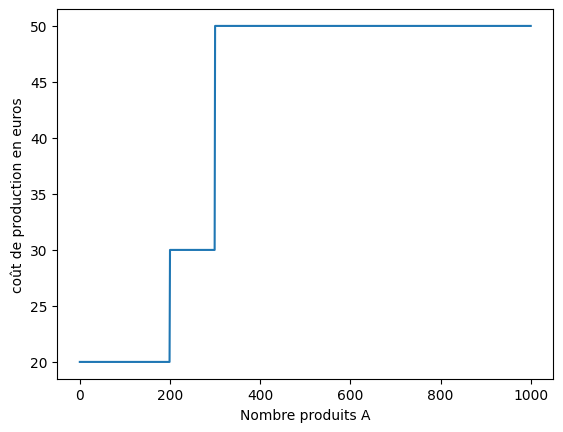

In [1]:
# On visualise nos contraintes de type conditionnelles  avec les valeurs réelles de notre problème
# Edit, peut-on qualifier ça de piecewize, pas sur, encore, car ce ne sont pas des fonctions pentues.
import matplotlib.pyplot as plt
plt.plot([0, 199, 200, 299,300,1000], [20,20,30, 30, 50 ,50])
plt.xlabel('Nombre produits A')
plt.ylabel('coût de production en euros')
plt.show()

# Dessiner les contraintes Piecewize avec Matplot

Hypothèse : La différence, avec les contraintes piecewize, c'est que ce sont des fonctions  linéaires qui décrivent l'évolution des coûts et pas des valeurs-seuils fixes.
On pourrait imaginer de les affecter dans l'optimisation, en fonction de leurs valeurs "breaking points". Reste à voir comment faire dans les solveurs , et si la logique reste valable en comparant avec ce que font les autres.

Hypothèse2 : Le but est de switcher en fonction des breaking point, afin que l'optimisation globale reste linéaire.
On décompose une fonction convexe en plusieurs parties linéaires selon une méthode précise, voir la documentation.

Voici un exemple :

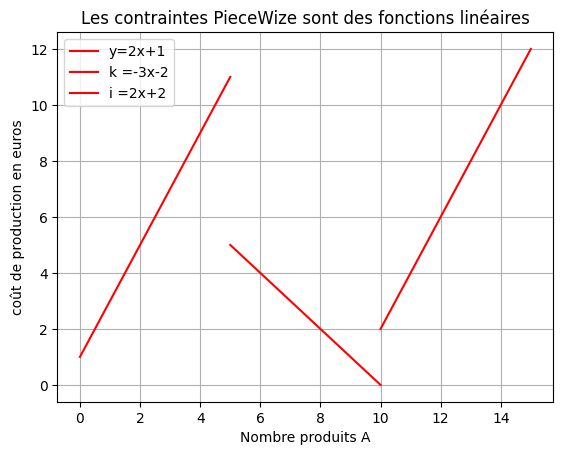

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,5,100)
t = np.linspace(5,10,100)
m = np.linspace(10,15,100)
y = 2*x+1
k = -1*x+5
i = 2*x+2
plt.plot(x, y, '-r', label='y=2x+1')
plt.plot(t, k, '-r', label='k =-3x-2')
plt.plot(m, i, '-r', label='i =2x+2')
plt.title('Les contraintes PieceWize sont des fonctions linéaires')
plt.xlabel('Nombre produits A')
plt.ylabel('coût de production en euros')
plt.legend(loc='upper left')
plt.grid()
plt.show()

